<hr>

# Welcome to Week 3
### Unsupervised learning
<hr>

#### Clustering Algorithms
Clustering puts data points into groups. It uses similarity and difference of features (or dimensions) to create groups in material that is unclassified and has no known targets. It’s particularly used in unsupervised learning as it can deal with vast amounts of uncategorised data however it creates groups so it’s useful in supervised learning as well. 

<hr>

<img src="figure/Clustering and its applications image 2.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>
 


Figure. Patterns in the sky (Susan, 2015)<br>
Yes you did! Our brains always look for patterns!

Why do we see patterns in the clouds? The traditional explanation is that it was very important to in individual’s survival to spot a jaguar in the undergrowth. Our brains cluster unconsciously. In fact, we are encoded to see patterns in everything such as shopping, traffic, clothes, sport etc.

<hr>

***The goal of clustering algorithms are to:***

- Group unlabelled data objects with similar properties together
- Discover interesting perhaps unexpected clusters in the data
- Find a valid or useful organisation of the data
<br>
In other words, we can define two algorithmic goals. We need to find objective functions to:

- Minimise intra-distance (distance between points in the same cluster)
- Maximise inter-distance (distance between points from different clusters)

<img src="figure/Clustering and its applications image 3.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

<hr>

### popular clustering methods are as follow:
1. KMeans
2. DBscan
3. Hierarchical 
4. KMeans++
5. VAT
6. IVAT

<hr>

<hr>

### Distance
Clustering between two groups  measureed by distance metrics.
Types of distance measurements:
- **Euclidean distance**
 distance is the ordinary straight-line distance between two points in Euclidean (everyday) space. For any two data instances, represented by d-dimensional feature vectors $x_i,x_j$  their Euclidean distance is computed as: <br>
### $d_{Euclidean}(x_i,x_j)=\sqrt{(x_{i,1}-x_{j,2})^2+...+(x_{d,1}-x_{d,2})^2}$
- **Cosine distance**
We previously introduced cosine distance in course 1. But as a reminder, we define Cosine distance for any two data instance represented by d-dimensional feature vectors .  The Cosine distance for these two feature vectors $x_i,x_j$ are computed as:<br>
### $d_{cosine}(x_i,x_j)=1-\frac{x_i^Tx_j}{||x_i||_2.||x_j||_2}$

- **Mahalanobis distance**
 (MD) is the distance between two points in multivariate space. For any two data instances, represented by  d-dimensional feature vectors  $x_i,x_j$ their Mahalanobis distance is computed as:<br>
### $d_{Mahalanobis}(x_i,x_j)=(x_{i}-x_{j})M^{-1}(x_i-x_j)^T$

- **Cityblock/Manhattan distance**
For any two data instances, represented by  d-dimensional feature vectors $x_i,x_j$, their Cityblock distance is computed as:<br>
### $d_{Cityblock}(x_i,x_j)=|x_{i,1}-x_{j,2}|+...+|x_{d,1}-x_{d,2})|$
- **Minkowski distance**
 defines a distance between two points in a normed vector space. Think of Euclidean distance (2 norm of $x_{i}-x_{j}$) and Cityblock distance as (1 norm of $x_{i}-x_{i}$) Minkowski distance is a generalization of these distances defined for any p-norm.<br>
### $d_{Minkowski}(x_i,x_j)=\sum_{i=0}^{n-1}|x_i-y_i|^p)^\frac{1}{p}$

    -  When $p=1$, the distance is known as the Manhattan distance.
    -  When $p=2$ the distance is known as the Euclidean distance.

- **Jaccard distance**
 is a distance used to measure diversity of any two sets. Consider any two instances $x_i$ and $x_j$ as binary vectors indicating presence or absence of features. Jaccard distance between $x_i$ and $x_j$ is defined as:<br>
### $d_{Jaccard}(x_i,x_j)=1-\frac{|x_i\cap x_j|_1}{|x_i\cup x_j|_1}$ <br>
More detils check week-3 class materials.

### KMeans
KMeans is an unsupervised clustring ML model, where the number of clusters is defined by $K$. $K$ is also called the number of neighbours.
<hr>
<img src="figure/kmean.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

<hr>

### Let's implemented in Python

In [1]:
import pandas as pd
import numpy as np
digit_zero=pd.read_csv("data/digitData0.csv",header=None)
digit_one=pd.read_csv("data/digitData1.csv",header=None)
digit_zero.shape
digit_zero.head()

0    1    2     3     4     5    6    7    8    9   ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63   64  
0  6.0  13.0  10.0   0.0  0.0  0.0  0.0  
1  0.0  11.0  16.0  10.0  0.0  0.0  1.0  
2  0.0   3.0  11.0  16.0  9.0  0.0  2.0  
3  7.0  13.0  13.0   9.0  0.0  0.0  3.0  
4  0.0   2.0  16.0   4.0  0.0  0.0  4.0  

[5 rows x 65 columns]

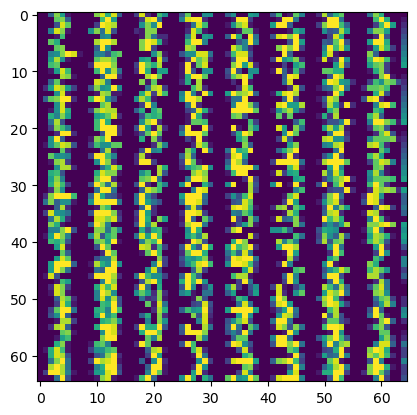

In [2]:
import matplotlib.pyplot as plt
plt.imshow(digit_one.values[0:65,:])

#### Seperating feature set and creating a ground truth for clustering model

In [3]:
Feature_set=pd.concat([digit_zero,digit_one],join="inner")
print(Feature_set.shape)
Feature_set.head()

(3218, 65)


0    1    2     3     4     5    6    7    8    9   ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63   64  
0  6.0  13.0  10.0   0.0  0.0  0.0  0.0  
1  0.0  11.0  16.0  10.0  0.0  0.0  1.0  
2  0.0   3.0  11.0  16.0  9.0  0.0  2.0  
3  7.0  13.0  13.0   9.0  0.0  0.0  3.0  
4  0.0   2.0  16.0   4.0  0.0  0.0  4.0  

[5 rows x 65 columns]

### Adding feature_header

In [5]:
cols=["feature_"+str(i+1) for i in range(Feature_set.shape[1]-1)]
cols.append("Target")
Feature_set.columns=cols

Feature_set.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_56  feature_57  \
0        0.0        0.0        0.0         0.0  ...         0.0         0.0   
1        0.0        0.0        0.0         0.0  ...         0.0         0.0   
2        0.0        0.0        0.0         0.0  ...         0.0         0.0   
3        0.0        0.0        0.0         8.0  ...         0.0         0.0   
4        0.0        0.0        0.0         0.0  ...         0.0         0.0   

   feature_58  feature_59  feature_60  feature_61  feature_62  feature_63  \
0         0.0         6.0        13.0        10.0         0.0         0.0   
1         0.0         0.0        11.0        16.0        10.0         0.0   
2         0.0         0.0         3.0        11.0        16.0         9.0   
3         0.0         7.0        13.0        13.0         9.0         0.0   
4         0.0         0.0         2.0        16.0         4.0         0.0   

   feature_64  Target  
0         0.0     0.0  
1         0.0     1.0  
2         0.0     2.0  
3         0.0     3.0  
4         0.0     4.0  

[5 rows x 65 columns]

<hr>

### How to define number of cluter,K?
***Elbow method***
<br>
Elbow method shows the optimum k value from a range of values usingdistence metrics.


C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

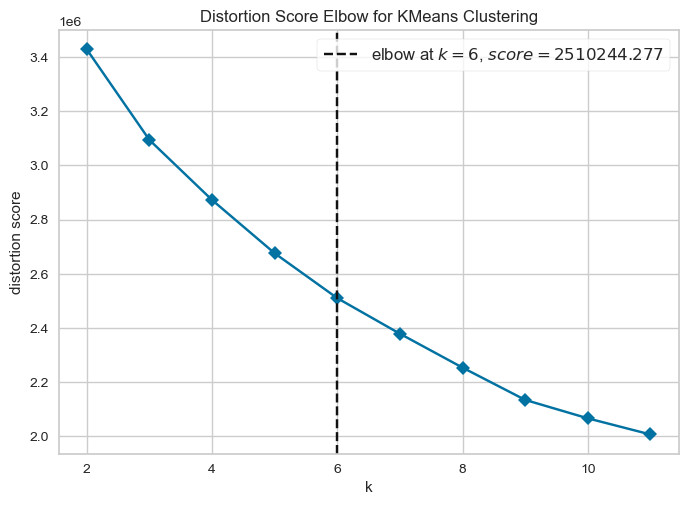

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X=Feature_set.iloc[:,0:-1]
y=Feature_set.iloc[:,-1]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion', timings=False
) #distortion same as Euclidean distance

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

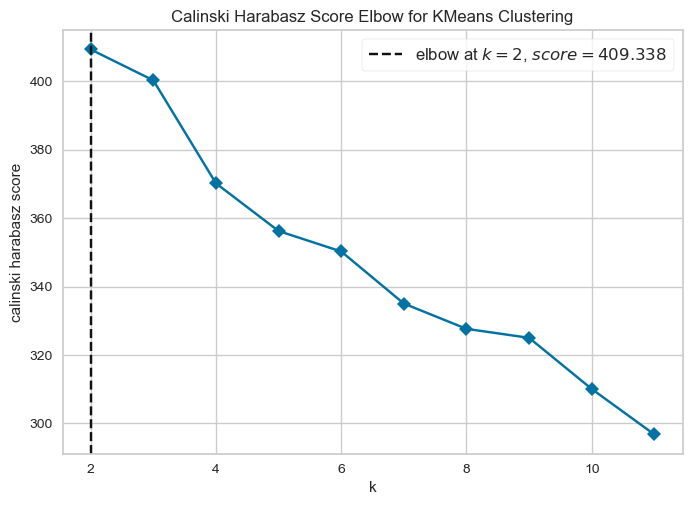

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X=Feature_set.iloc[:,0:-1]
y=Feature_set.iloc[:,-1]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
) #distortion same as Euclidean distance

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X=Feature_set.iloc[:,0:-1]
y_true=Feature_set.iloc[:,-1]
model = KMeans(n_clusters=2)
y_pred=model.fit_predict(X)

C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## performance metrics
- Rand Index
- Purity
- Mutual Information
- Silhouette Coefficient
- f1
- recall
- accuracy
- precision


In [15]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [16]:
from sklearn import metrics
y_true=[0,0,0,1,1,1,1]
y_pred=[0,0,0,1,1,0,1]
print(y_true)
print(y_pred)
contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
print(contingency_matrix)

[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 1]
[[3 0]
 [1 3]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.01      0.00       320
         1.0       0.02      0.06      0.03       327
         2.0       0.00      0.00      0.00       318
         3.0       0.00      0.00      0.00       328
         4.0       0.00      0.00      0.00       323
         5.0       0.00      0.00      0.00       325
         6.0       0.00      0.00      0.00       323
         7.0       0.00      0.00      0.00       320
         8.0       0.00      0.00      0.00       313
         9.0       0.00      0.00      0.00       321

    accuracy                           0.01      3218
   macro avg       0.00      0.01      0.00      3218
weighted avg       0.00      0.01      0.00      3218



C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Purity

In [22]:
print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)

purity_score: 0.202


# Task
1. Read the "digitData3.csv" and "digitData4.csv" files and create KMeans clustering
2. Select the optimum k value using Silhouette Coefficient.
3. Find the mutual information and Rand Index between predicted and true class.


<hr>

## DBSCAN 
**DBSCAN** - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density. [More details](\url{https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html})

<hr>

In [23]:
from sklearn.cluster import DBSCAN
X=Feature_set.iloc[:,0:-1]
y_true=Feature_set.iloc[:,-1]
model = DBSCAN(eps=0.3, min_samples=10)
y_pred=model.fit_predict(X)

print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)


purity_score: 0.102


<hr>

# Task
1. Read the "digitData3.csv" and "digitData4.csv" files and create DBSCAN clustering
2. Find the optimum "eps" and "min_samples" value .
3. Find the mutual information and Rand Index between predicted and true class.

<hr>

## Hierarchy
**Hierarchical clustering** is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.[More details](\url{https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering})
<hr>

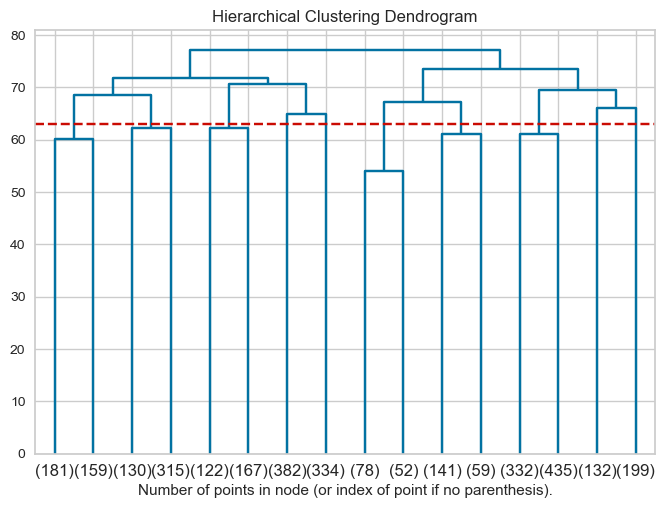

In [24]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X=Feature_set.iloc[:,0:-1]
y_true=Feature_set.iloc[:,-1]
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,linkage="complete",n_clusters=None)
model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.axhline(y=63, color='r', linestyle='--')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [25]:
model = AgglomerativeClustering( linkage="complete",n_clusters=2)

y_pred = model.fit_predict(X)
print(
    "purity_score: %0.3f"
    % purity_score(y_true, y_pred)
)


purity_score: 0.198


<hr>

# Task
1. Read the "digitData3.csv" and "digitData4.csv" files and create Hierarchy clustering
2. Find the optimum "n_clusters" using "manhattan" distance.
3. Find the mutual information and Rand Index between predicted and true class.

<hr>

# End of Week 3
<hr>